In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt  

In [2]:
#获取数据
score_data = pd.read_csv('./哪吒影评数据.csv')
score_data.describe()

,性别,评论者等级,评分
count,578760.000000,578760.000000,578760.000000
mean,0.870978,1.881113,4.832641
std,0.852165,0.850534,0.550903
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000
50%,1.000000,2.000000,5.000000
75%,2.000000,2.000000,5.000000
max,2.000000,6.000000,5.000000


In [3]:
score_data.groupby('性别',as_index=False)

In [4]:
score_data.groupby('性别',as_index=False).count()

,性别,时间,城市,昵称,评论者等级,评分,评论内容
0,0,252297,252196,251373,252297,252297,252296
1,1,148839,148803,148054,148839,148839,148839
2,2,177624,177535,176611,177624,177624,177621


In [5]:
gender_data = score_data.groupby('性别',as_index=False).count()[['性别','昵称']]
gender_count = gender_data.rename(columns={'性别':'gender','昵称':'people_count'})

In [6]:
gender_count

,gender,people_count
0,0,251373
1,1,148054
2,2,176611


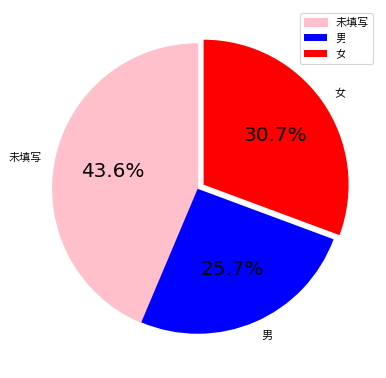

In [7]:
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=10)

#各部分标签
label_list = ['未填写','男','女']  
#各部分大小
size = [251373,148054,176611]
#各部分颜色
color = ['green','blue','red']
#各部分突出值
explode = [0,0,0.05]

#绘制饼图
plt.figure(figsize=(6,6),dpi=80)

patches,l_text,p_text = plt.pie(size,
                               explode = explode,
                               colors = color,
                               labels = label_list,
                               labeldistance = 1.1,
                               autopct = '%1.1f%%',
                               shadow = False,
                               startangle = 90,
                               pctdistance = 0.6)

for t in l_text:
#     print(dir(t))
    t.set_fontproperties(my_font)

for t in p_text:
    t.set_size(18)

for i in patches:
    i.set_color('pink')
    break 

plt.legend(prop=my_font)

plt.show()

In [8]:
#1.查看影评人性别占比，并做饼图展示,并用一句话描述你的结论 (0是性别未填写，1是性别男，二是性别女)

#结论: 哪吒影评人员已知性别中女性高于男性5个百分点,说明电影受男生和女生的普遍欢迎.

In [9]:
score_data.groupby('城市',as_index=False)

In [10]:
score_data.groupby('城市',as_index=False).count()

,城市,时间,性别,昵称,评论者等级,评分,评论内容
0,万宁,129,129,127,129,129,129
1,万州,436,436,430,436,436,436
2,万荣,29,29,29,29,29,29
3,万载,29,29,29,29,29,29
4,三亚,662,662,661,662,662,662
...,...,...,...,...,...,...,...
1087,龙口,452,452,452,452,452,452
1088,龙岩,705,705,701,705,705,705
1089,龙泉,59,59,58,59,59,59
1090,龙海,220,220,216,220,220,220


In [11]:
city_data = score_data.groupby('城市',as_index=False).count()[['城市','昵称']]
city_count = city_data.rename(columns={'城市':'city','昵称':'city_people_count'})

In [12]:
city_count

,city,city_people_count
0,万宁,127
1,万州,430
2,万荣,29
3,万载,29
4,三亚,661
...,...,...
1087,龙口,452
1088,龙岩,701
1089,龙泉,58
1090,龙海,216


In [13]:
city_rank = city_count.sort_values(by='city_people_count',ascending=False).head(10)

In [14]:
city_rank

,city,city_people_count
152,北京,20234
686,深圳,18769
394,广州,16442
454,成都,15893
13,上海,14933
969,重庆,9825
26,东莞,9812
996,长沙,8291
576,武汉,7999
264,天津,7647


In [15]:
a = city_rank['city']
b = city_rank['city_people_count']

In [16]:
print(a)
print(b)

152    北京
686    深圳
394    广州
454    成都
13     上海
969    重庆
26     东莞
996    长沙
576    武汉
264    天津
Name: city, dtype: object
152    20234
686    18769
394    16442
454    15893
13     14933
969     9825
26      9812
996     8291
576     7999
264     7647
Name: city_people_count, dtype: int64


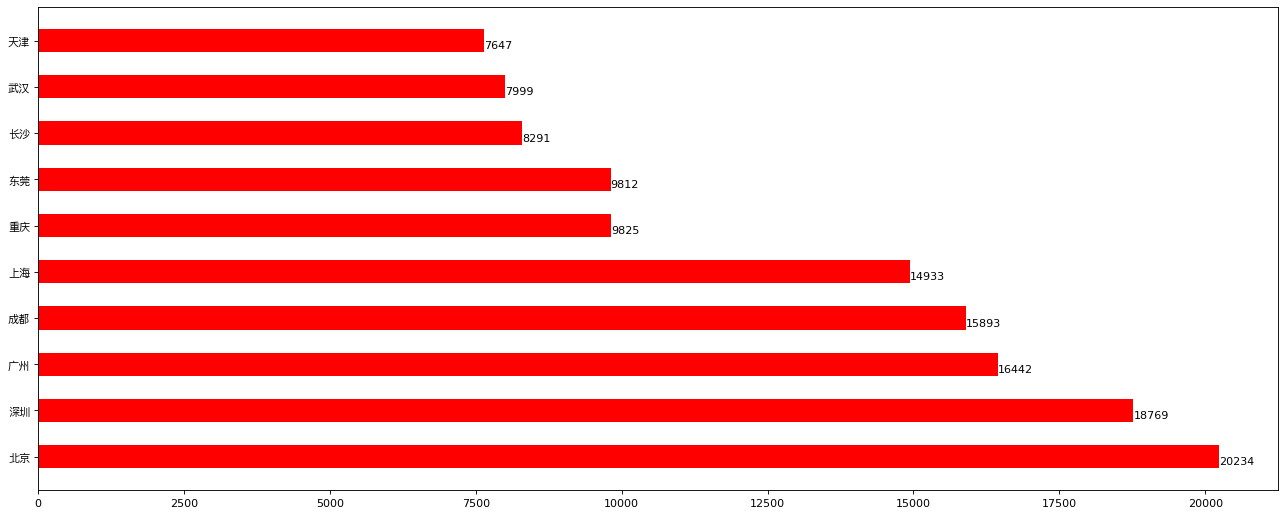

In [17]:
plt.figure(figsize=(20,8),dpi=80)
#绘制横向的条形图
rects = plt.barh(range(len(a)),b,height=0.5,color='r')
plt.yticks(range(len(a)),a,fontproperties=my_font)
#在条形图上加标注(水平居中)
for rect in rects:
    width=rect.get_width()
    plt.text(width,rect.get_y()+0.3/2,str(width),va='center')
plt.show()

In [18]:
#2.查看观影人数前十的热门城市，并做横向柱状图,并用一句话描述你的结论

#结论:观影人数前十的热门城市北京,深圳,广州位列前三.

In [19]:
score_data.groupby('评分',as_index=False).count()

,评分,时间,城市,性别,昵称,评论者等级,评论内容
0,0.0,605,605,605,605,605,605
1,0.5,3380,3378,3380,3357,3380,3380
2,1.0,936,936,936,932,936,936
3,1.5,666,665,666,664,666,666
4,2.0,763,763,763,760,763,763
5,2.5,2194,2193,2194,2185,2194,2194
6,3.0,3994,3991,3994,3971,3994,3994
7,3.5,4570,4569,4570,4551,4570,4570
8,4.0,26702,26695,26702,26584,26702,26702
9,4.5,46463,46444,46463,46298,46463,46463


In [20]:
rank_data = score_data.groupby('评分',as_index=False).count()[['评分','昵称']]
rank_count = rank_data.rename(columns={'评分':'score','昵称':'score_count'})

In [21]:
rank_count

,score,score_count
0,0.0,605
1,0.5,3357
2,1.0,932
3,1.5,664
4,2.0,760
5,2.5,2185
6,3.0,3971
7,3.5,4551
8,4.0,26584
9,4.5,46298


In [22]:
group_score = rank_count['score_count'].sum()
print(group_score)

576038


In [23]:
result = 486131/group_score
print(round(result,2))

0.84


In [24]:
#3.统计各评分的人数,给出评为满分人数占总体人数的百分比，并用一句话描述你的结论

#结论: 影评满分占比84%,满意度很高。